# Finding the best markets to advertise an E product

Assume that we are working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Refer the raw-data folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
# Read the data

import pandas as pd

pd.set_option('display.max_columns', None) # Done to display the entire o/p
pd.set_option('display.max_rows', None)


survey_data=pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Explore the data
survey_data.shape

(18175, 136)

In [3]:
survey_data.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Check for population representavity

Since the data we are using comes from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) it is not a population data obviously but a sample data. Before we start to analyze the data we need to clarify whether it is representative for our population of interest and it has the right categories of people for our purpose.

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a *population* of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

In [4]:
# Explore the JobRole Interest column which tells the job role the candidate would be interested in

(survey_data["JobRoleInterest"]
 .value_counts(normalize=True)
 .sort_values(ascending=False))

Full-Stack Web Developer                                                                                                                                                                                                                                                                              0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                                             0.064359
  Data Scientist                                                                                                                                                                                                                                                                                      0.021739
Back-End Web Developer                                                                     

From the above we can see that:

1. There are significant number of people interested in full stack web development,front end development and back end development
2. There are a few people who are interested in mobile developer job role
3. We can see a significant number of people who have interested in more than one job role.

It will be interesting to see how many people have interest in more than one job role and how many have interest in only one job role. We will anayse this in the next code.

In [5]:
# Analyse no of People having single or mixed interests in job roles

# We will first drop the null values

survey_data.dropna(axis=0,subset=["JobRoleInterest"],inplace=True)

no_nulls_jobt=survey_data["JobRoleInterest"].str.split(",")



From the above we can see that only 31% of the people are clear about which exact job role interests them while most of them have multiple interests. It is good for us since we have multiple courses to offer.

Now we need to explore if most of the people are interested in a job role of web or mobile development.

In [6]:
# Get the count of people interested in either web or mobile development or any other jobs

web_mob_interested=survey_data["JobRoleInterest"].str.contains('Web Developer|Mobile Developer')

web_mob_interested.value_counts(normalize=True)*100

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

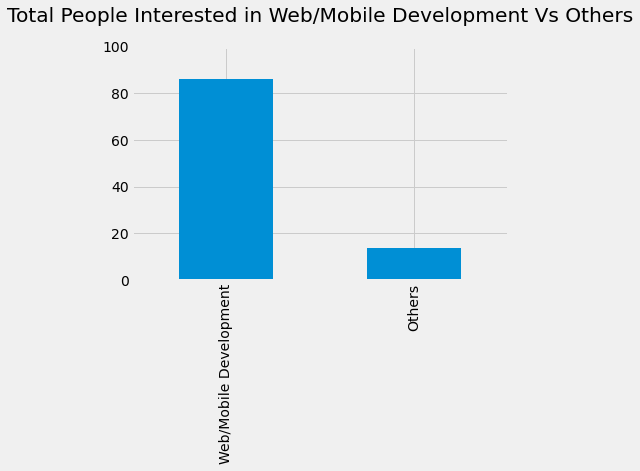

In [7]:
# Plot the above results

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("fivethirtyeight")
(web_mob_interested.value_counts(normalize=True)*100).plot.bar()

plt.title("Total People Interested in Web/Mobile Development Vs Others",y=1.08)

plt.xticks([0,1],["Web/Mobile Development","Others"])

plt.ylim((0,100))

plt.show()

From the above graph it is evident that more than 80% of the people are interested in a job role of web or mobile development which is very ideal for us since most of our course portfolio lies in these domains itself. With this we can safely assume that our sample is a good representative of the population.

# Location wise analysis of new coders

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.



In [8]:
# Generate a absolute and relative frequency table for CountryLive variable

# Generate a absolute and relative frequency table for CountryLive variable

# Absolute freq table

abs_freq=survey_data["CountryLive"].value_counts()

rel_freq=survey_data["CountryLive"].value_counts(normalize=True)*100

freq_table=pd.DataFrame({"Abs Freq":abs_freq,"Rel Freq":rel_freq})

freq_table


,Abs Freq,Rel Freq
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the above table we can see that United States of America has the highest number of new coders interested in learning codes (almost 45%) following by India which has only 8% share followed by UK and Canada with ~4% each.

We can focus on US majorly.However out of the new coders set we need to also understand how many are actually willing to pay some amount to learn or they are majorly willing to learn only for free.If that is the case we might not be interested to look out for those people and might consider a market which has a relatively smaller share in number of new coders but majority of them are willing to pay a certain amount to learn coding.

# Monthly amount spend to learn

The *MoneyForLearning* column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.


In [9]:
# Get the monthly amount spent by every user to learn programming for the selected countires above
#Use the MonthsProgramming and MoneyForLearning column to do the same

# In MonthsProgramming column we have some values as 0.Maybe the respondents might have just started coding
#We will assingn the value as 1 for those respondents

survey_data["MonthsProgramming"].replace(0,1,inplace=True)

survey_data["amtspent_per_mon"]=survey_data["MoneyForLearning"]/survey_data["MonthsProgramming"]

# Check for null values in amtspent_per_mon

survey_data["amtspent_per_mon"].isnull().sum()

675

In [10]:
# Get rid of the null values
survey_data=survey_data[survey_data["amtspent_per_mon"].notnull()]

In [11]:
# We will be grouping on the CountryLive columns so we will check for null values and get rid of them as well
survey_data["CountryLive"].isnull().sum()

105

In [12]:
survey_data=survey_data[survey_data["CountryLive"].notnull()]
survey_data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFunFunFunction', 'YouTubeGoogleDev', 'YouTubeLearnCode',
       'YouTubeLevelUpTuts', 'YouTubeMIT', 'YouTubeMozillaHacks',
       'YouTubeOther', 'YouTubeSimplilearn', 'YouTubeTheNewBoston',
       'amtspent_per_mon'],
      dtype='object', length=137)

In [13]:
# Calculate the country wise avg monthly spend by user
country_mean=survey_data.groupby("CountryLive")

country_mean["amtspent_per_mon"].mean()[["United States of America","India","United Kingdom","Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: amtspent_per_mon, dtype: float64

From the above we can see that people in the United States are willing to pay a ~228 dollars per month to learn coding followed by India which says 135$. It is surprising to see that people in the United Kingdom and Canada have a average amount lower than India considering the currency value comparison of these countries. 

It could be possible that we do not have sufficient representation in the data frok UK and Canada. It could also be that the data belonging to India might have some high values which are inflating the average. Or else our findings might be correct.

# Detecting Outliers

We will use boxplots on the amtspent_per_mon column to detect outliers for the above countries.

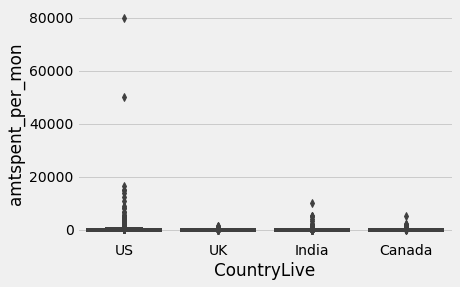

In [14]:
import seaborn as sns

plt.style.use("fivethirtyeight")

sns.boxplot(y="amtspent_per_mon",x="CountryLive",data=survey_data[survey_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")])


plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

From the above plots it is not very clear if there are extreme outliers.However we can see some users in the US spending approx 50000 dollars and 80000 dollars respectively which is not impossible but highly unlikely.

We will get rid of these values and plot the boxplot again.


In [15]:
# Get rid of outliers

survey_data=survey_data[survey_data["amtspent_per_mon"]<40000]

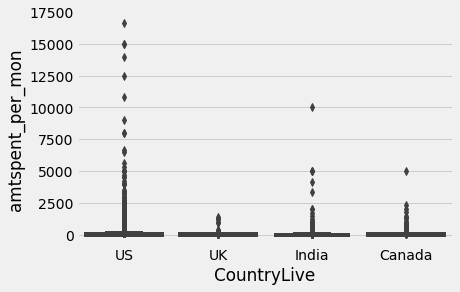

In [16]:
#Plot the bpxplot again


plt.style.use("fivethirtyeight")

sns.boxplot(y="amtspent_per_mon",x="CountryLive",data=survey_data[survey_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")])


plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()


After removing the outliers we again see some extreme values in the US and India as well.Lets explore those users.

For India we see respondents who have spend more than 2500 dollars every month on learning.We need to check what bootcamps they attended and if they were very expensive.

In [17]:
# Outliers in India
survey_data[(survey_data["CountryLive"]=="India") & (survey_data["amtspent_per_mon"]>2500)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amtspent_per_mon
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,N

It seems that the respondents in India who have spent more than 2500 dollars per month do not seem to have attended any bootcamps. It might be they have included their university tuition fees in this as well.The question was Aprt from the University fees how much have you spent to learn on coding so far? It might be they got the question incorrect. It is hard to figure out if this is true. However we will be removing them for now.

In [18]:
# Remove outliers in India
outliers_India=survey_data[(survey_data["CountryLive"]=="India") & (survey_data["amtspent_per_mon"]>2500)]
survey_data=survey_data.drop(outliers_India.index)

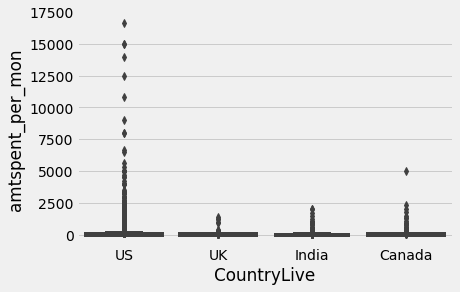

In [19]:
plt.style.use("fivethirtyeight")

sns.boxplot(y="amtspent_per_mon",x="CountryLive",data=survey_data[survey_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")])


plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()


In [20]:
# Outliers in US
survey_data[(survey_data["CountryLive"]=="United States of America") & (survey_data["amtspent_per_mon"]>=6000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,amtspent_per_mon
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In the above result we can see that some people have attended certain bootcamps which justifies their high spending.
However for the people who have not attended bootcamps it is highly unlikely to spend such a large amount

There are some people who had been learning for very less time( 3 to 4 months) and have spend such a huge amount. This could be because they recently registered for a bootcamp and will not end up spending on learning for coming 7 to 8 months. In this case the amount spent per month is not reliable.

We will be removing people who did not attend a bootcamp and have spend less than 3 months learning programming.

In [23]:
# Remove people who have not attended any bootcamp and spend  3 or less than 3 months in programming

no_bootcamp = survey_data[
    (survey_data['CountryLive'] == 'United States of America') & 
    (survey_data['amtspent_per_mon'] >= 6000) &
    (survey_data['AttendedBootcamp'] == 0)
]

survey_data = survey_data.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = survey_data[
    (survey_data['CountryLive'] == 'United States of America') & 
    (survey_data['amtspent_per_mon'] >= 6000) &
    (survey_data['MonthsProgramming'] <= 3)
]

survey_data = survey_data.drop(less_than_3_months.index)

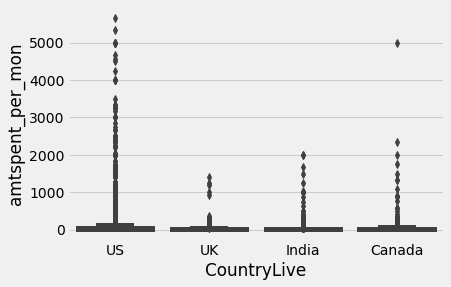

In [22]:
# Plot the boxplot

plt.style.use("fivethirtyeight")

sns.boxplot(y="amtspent_per_mon",x="CountryLive",data=survey_data[survey_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")])


plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()


We can see one respondent who has spend 5000 dollars per month in Canada. We will get rid of this value as well.


In [26]:
# Remove outliers for Canada

Canada_outlier = survey_data[
    (survey_data['CountryLive'] == 'Canada') & 
    (survey_data['amtspent_per_mon'] >= 3000)]

survey_data = survey_data.drop(Canada_outlier.index)


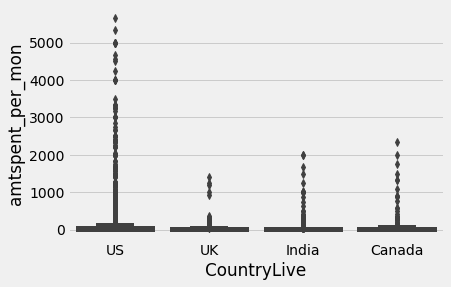

In [27]:
# Plot the boxplot

plt.style.use("fivethirtyeight")

sns.boxplot(y="amtspent_per_mon",x="CountryLive",data=survey_data[survey_data["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")])


plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Looking at the boxplots we can say that there are no extreme outliers in the data after cleaning.

Now we will recompute the country wise average spends

In [28]:
# Calculate the country wise avg monthly spend by user
country_mean=survey_data.groupby("CountryLive")

country_mean["amtspent_per_mon"].mean()[["United States of America","India","United Kingdom","Canada"]] 


CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: amtspent_per_mon, dtype: float64

# Choosing the Best Market

Looking at the table above definitely USA is our best choice because it has both;higher number of new coders as well as people who are ready to spend on an average 142 dollars per month.

Canada seems to be a good choice because the average monthly spend per customer is 93 dollars compared to India which is 65 dollars considering our monthly subscription plan of 59 dollars.However we also need to take into account that the number of new coders share is almost double in India compared to Canada.

In [31]:
survey_data["CountryLive"].value_counts(normalize=True)[["United States of America","India","United Kingdom","Canada"]]*100

United States of America    47.165240
India                        7.381683
United Kingdom               4.506542
Canada                       3.860443
Name: CountryLive, dtype: float64

Considering all the scenarios we have the below options:

1. Concentrate only on the USA market.
2. Concentrate on USA and India market with 70% budget spend on USA and 30% on India.
3. Concentrate on USA,India and Canada markets with 60% budget on USA,25% on India and 20% on Canada)

# Conclusion

In this project we analysed the new coders survey data to find the best two markets to advertise our products. We definitely know that USA is our potential new market.

However we do not have a clear conclusion with the second best market and have India and Canada as two best options. The best workaround right now is to let the marketing team decide to take a call based on the domain expertise.